In [ ]:
pip install mpld3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
# keeps the plots in one place. calls image as static pngs
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
#load data

from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

data = pd.DataFrame(breast.data, columns=breast.feature_names)
data['Target'] = pd.Series(data=breast.target, index=data.index)

In [397]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [395]:
data.shape

(569, 31)

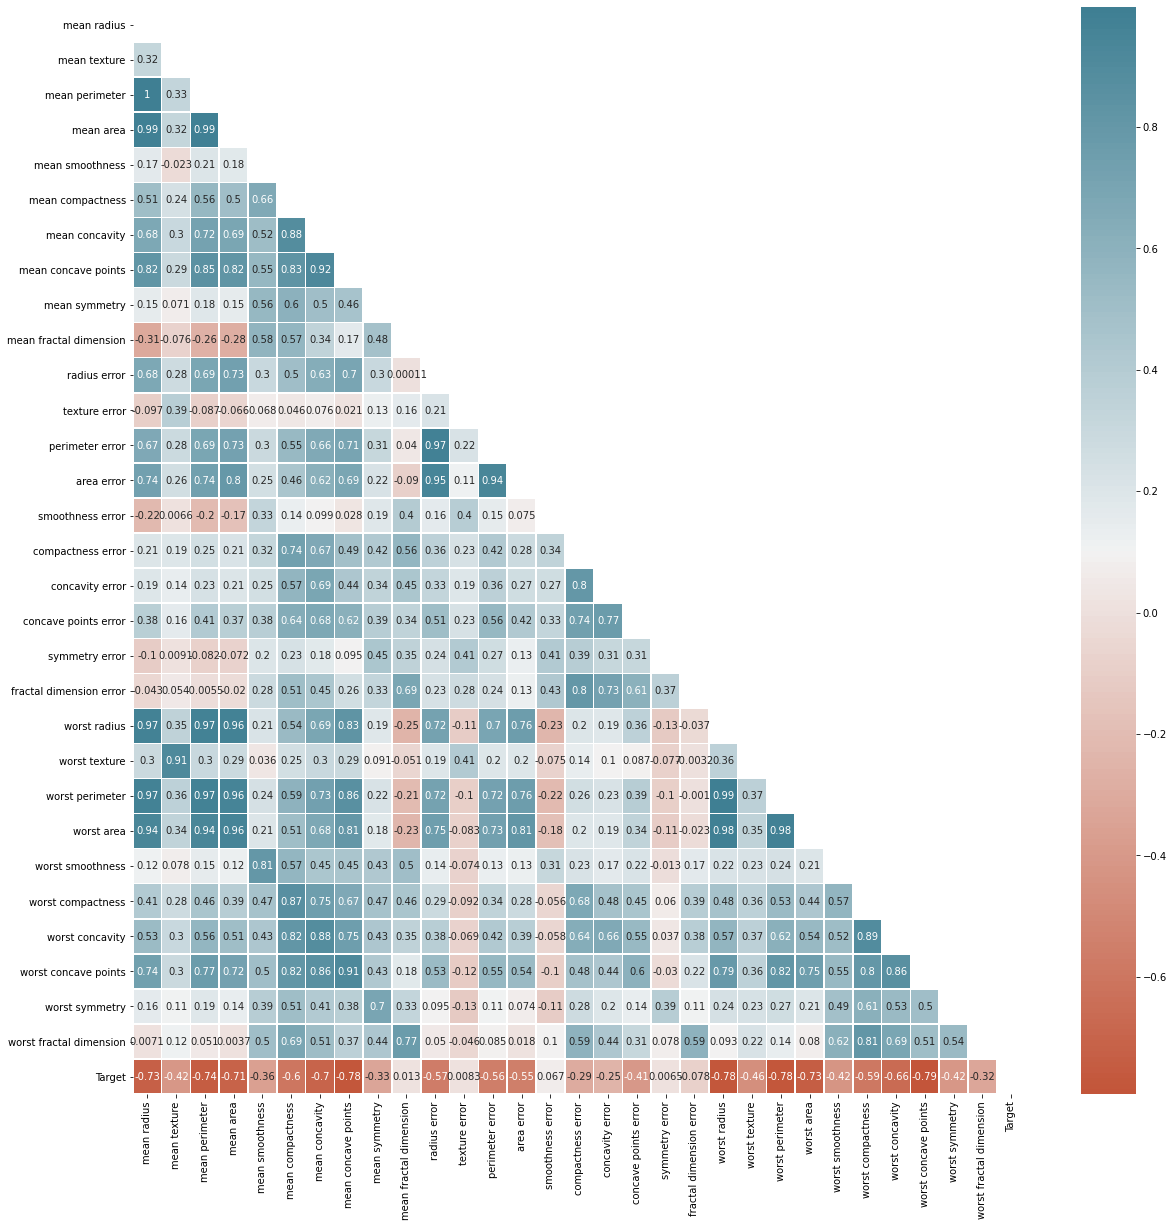

In [5]:
f,ax = plt.subplots(figsize=(20, 20))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), annot=True, linewidths=.5, mask = mask, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [6]:
cor_70 = [i for i in list(data.columns) if abs(np.corrcoef(data[i], data['Target'])[1,0]) >= 0.7 and i != 'Target']

cor_60 = [i for i in list(data.columns) if abs(np.corrcoef(data[i], data['Target'])[1,0]) >= 0.6 and i != 'Target']

cor_50 = [i for i in list(data.columns) if abs(np.corrcoef(data[i], data['Target'])[1,0]) >= 0.5 and i != 'Target']

cor_00 = [i for i in list(data.columns) if i != 'Target']


In [7]:
# Train and Test dataset
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(data[cor_70], data['Target'], test_size = 0.3, random_state = 42)
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(data[cor_60], data['Target'], test_size = 0.3, random_state = 42)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(data[cor_50], data['Target'], test_size = 0.3, random_state = 42)
X_train_00, X_test_00, y_train_00, y_test_00 = train_test_split(data[cor_00], data['Target'], test_size = 0.3, random_state = 42)


In [8]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()

X_train_70 = sc.fit_transform(X_train_70)
X_test_70 = sc.transform(X_test_70)

X_train_60 = sc.fit_transform(X_train_60)
X_test_60 = sc.transform(X_test_60)

X_train_50 = sc.fit_transform(X_train_50)
X_test_50 = sc.transform(X_test_50)

X_train_00 = sc.fit_transform(X_train_00)
X_test_00 = sc.transform(X_test_00)

X_train = [X_train_00, X_train_50, X_train_60, X_train_70]
y_train = [y_train_00, y_train_50, y_train_60, y_train_70]
X_test = [X_test_00, X_test_50, X_test_60, X_test_70]
y_test = [y_test_00, y_test_50, y_test_60, y_test_70]

In [9]:
# Toi uu thuat toan DecisionTree
def dct(X_train,Y_train, score = False):
  tree  = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 1)
  tree2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 2)
  tree3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 3)
  tree4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 4)
  tree5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 5)
  tree6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 6)
  tree7 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 7)
  tree8 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 8)
  tree9 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 9)
  tree10 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 10)

  tree.fit(X_train,Y_train)
  tree1.fit(X_train,Y_train)
  tree2.fit(X_train,Y_train)
  tree3.fit(X_train,Y_train)
  tree4.fit(X_train,Y_train)
  tree5.fit(X_train,Y_train)
  tree6.fit(X_train,Y_train)
  tree7.fit(X_train,Y_train)
  tree8.fit(X_train,Y_train)
  tree9.fit(X_train,Y_train)
  tree10.fit(X_train,Y_train)

  if score == True:
    return[tree1.score(X_train,Y_train), tree2.score(X_train,Y_train), 
         tree3.score(X_train,Y_train), tree4.score(X_train,Y_train), tree5.score(X_train,Y_train),
         tree6.score(X_train,Y_train), tree7.score(X_train,Y_train), tree8.score(X_train,Y_train),
         tree9.score(X_train,Y_train), tree10.score(X_train,Y_train), tree.score(X_train,Y_train)]
  else:
    return [tree1.fit(X_train,Y_train), tree2.fit(X_train,Y_train),
            tree3.fit(X_train,Y_train), tree4.fit(X_train,Y_train), tree5.fit(X_train,Y_train),
            tree6.fit(X_train,Y_train), tree7.fit(X_train,Y_train), tree8.fit(X_train,Y_train),
            tree9.fit(X_train,Y_train), tree10.fit(X_train,Y_train), tree.fit(X_train,Y_train)]
  


In [10]:
# List accuracy score model cua cac tap test 
tree_test_score = []
for j in range(len(X_test)):
  tree_test_score1 = []   
  for i in range(11):
    #tree_test_score1.append(accuracy_score(dct(X_train[j], y_train[j])[i].predict(X_test[j]), y_test[j]))
    tree_test_score1.append(cross_val_score(dct(X_train[j], y_train[j])[i], X_test[j], y_test[j], scoring="accuracy", cv = 5).mean())
  tree_test_score.append(tree_test_score1)

# List f1 score model cua cac tap test 
tree_test_f1_score = []
for j in range(len(X_test)):
  tree_test_f1_score1 = []   
  for i in range(11):
    #tree_test_f1_score1.append(f1_score(dct(X_train[j], y_train[j])[i].predict(X_test[j]), y_test[j]))
    tree_test_f1_score1.append(cross_val_score(dct(X_train[j], y_train[j])[i], X_test[j], y_test[j], scoring="f1", cv = 5).mean())
  tree_test_f1_score.append(tree_test_f1_score1)


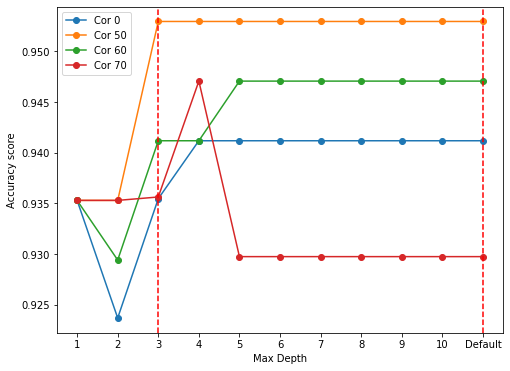

In [11]:
#Plot accuracy score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(8, 6))

for i in range(len(X_test)):
  plt.plot(['1','2','3','4','5','6','7','8','9','10','Default'], tree_test_score[i], '-o', label = X_test_name[i])

plt.axvline(x = 2, color='red', ls = '--')
plt.axvline(x = 10, color='red', ls = '--')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')
plt.show() # Depth 3- 10 or default, cor 50:  0.9529411764705882

#print(tree_test_score[1][2],tree_test_score[1][10])

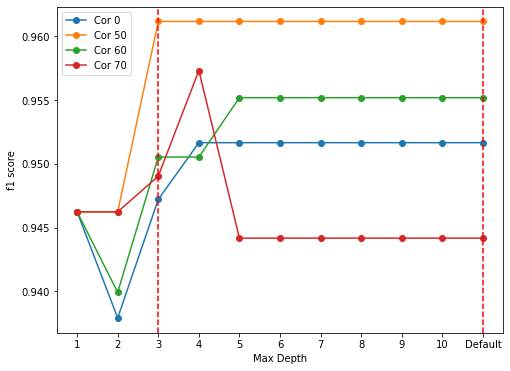

In [12]:
#Plot f1 score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(8, 6))
for i in range(len(X_test)):
  plt.plot(['1','2','3','4','5','6','7','8','9','10','Default'],
            tree_test_f1_score[i], '-o', label = X_test_name[i])
  
plt.legend(loc = 'best')
plt.axvline(x = 2, color='red', ls = '--')
plt.axvline(x = 10, color='red', ls = '--')
plt.xlabel('Max Depth')
plt.ylabel('f1 score')
plt.show()  # Depth 3-10 or default, cor 50: 0.9611608071562305
#print(tree_test_f1_score[1])

In [13]:
# Toi uu thuat toan KNN
def knn(X_train,Y_train, score = False):
  kn1  = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
  kn2  = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
  kn3  = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
  kn4  = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
  kn5  = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  kn6  = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
  kn7  = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
  kn8  = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
  kn9  = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
  kn10 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
  kn11 = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
  kn12 = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p = 2)
  kn13 = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', p = 2)
  kn14 = KNeighborsClassifier(n_neighbors = 14, metric = 'minkowski', p = 2)
  kn15 = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
  kn16 = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p = 2)
  kn17 = KNeighborsClassifier(n_neighbors = 17, metric = 'minkowski', p = 2)
  kn18 = KNeighborsClassifier(n_neighbors = 18, metric = 'minkowski', p = 2)
  kn19 = KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', p = 2)
  kn20 = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)

  kn1.fit(X_train,Y_train)
  kn2.fit(X_train,Y_train)
  kn3.fit(X_train,Y_train)
  kn4.fit(X_train,Y_train)
  kn5.fit(X_train,Y_train)
  kn6.fit(X_train,Y_train)
  kn7.fit(X_train,Y_train)
  kn8.fit(X_train,Y_train)
  kn9.fit(X_train,Y_train)
  kn10.fit(X_train,Y_train)
  kn11.fit(X_train,Y_train)
  kn12.fit(X_train,Y_train)
  kn13.fit(X_train,Y_train)
  kn14.fit(X_train,Y_train)
  kn15.fit(X_train,Y_train)
  kn16.fit(X_train,Y_train)
  kn17.fit(X_train,Y_train)
  kn18.fit(X_train,Y_train)
  kn19.fit(X_train,Y_train)
  kn20.fit(X_train,Y_train)

  if score == True:
    return[kn1.score(X_train,Y_train), kn2.score(X_train,Y_train), 
         kn3.score(X_train,Y_train), kn4.score(X_train,Y_train), kn5.score(X_train,Y_train),
         kn6.score(X_train,Y_train), kn7.score(X_train,Y_train), kn8.score(X_train,Y_train),
         kn9.score(X_train,Y_train), kn10.score(X_train,Y_train),kn11.score(X_train,Y_train),
         kn12.score(X_train,Y_train), kn13.score(X_train,Y_train), kn14.score(X_train,Y_train), 
         kn15.score(X_train,Y_train), kn16.score(X_train,Y_train), kn17.score(X_train,Y_train), 
         kn18.score(X_train,Y_train), kn19.score(X_train,Y_train), kn20.score(X_train,Y_train)]
  else:
    return [kn1.fit(X_train,Y_train), kn2.fit(X_train,Y_train),
            kn3.fit(X_train,Y_train), kn4.fit(X_train,Y_train), kn5.fit(X_train,Y_train),
            kn6.fit(X_train,Y_train), kn7.fit(X_train,Y_train), kn8.fit(X_train,Y_train),
            kn9.fit(X_train,Y_train), kn10.fit(X_train,Y_train),kn11.fit(X_train,Y_train), 
            kn12.fit(X_train,Y_train), kn13.fit(X_train,Y_train), kn14.fit(X_train,Y_train), 
            kn15.fit(X_train,Y_train), kn16.fit(X_train,Y_train), kn17.fit(X_train,Y_train), 
            kn18.fit(X_train,Y_train), kn19.fit(X_train,Y_train), kn20.fit(X_train,Y_train)]
  


In [14]:
# List accuracy score model cua cac tap test 
knn_test_score = []
for j in range(len(X_test)):
  knn_test_score1 = []   
  for i in range(20):
    #knn_test_score1.append(accuracy_score(knn(X_train[j], y_train[j])[i].predict(X_test[j]), y_test[j]))
     knn_test_score1.append(cross_val_score(knn(X_train[j], y_train[j])[i], X_test[j], y_test[j], scoring="accuracy", cv = 5).mean())
  knn_test_score.append(knn_test_score1)

# List f1 score model cua cac tap test 
knn_test_f1_score = []
for j in range(len(X_test)):
  knn_test_f1_score1 = []   
  for i in range(20):
    #knn_test_f1_score1.append(f1_score(knn(X_train[j], y_train[j])[i].predict(X_test[j]), y_test[j]))
    knn_test_f1_score1.append(cross_val_score(knn(X_train[j], y_train[j])[i], X_test[j], y_test[j], scoring="f1", cv = 5).mean())
  knn_test_f1_score.append(knn_test_f1_score1)

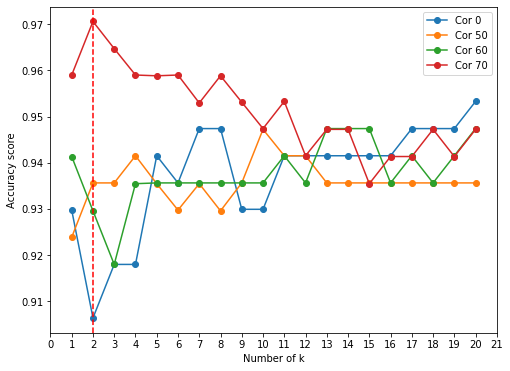

In [15]:
#Plot accuracy score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(8, 6))
for i in range(len(X_test)):
  plt.plot(range(1,21),
            knn_test_score[i], '-o', label = X_test_name[i])
  plt.xticks(np.arange(min(range(22)), max(range(22))+1, 1.0))
plt.axvline(x = 2, color='red', ls = '--')
plt.xlabel('Number of k')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')
plt.show()  # k = 2, cor = 70 : 0.9705882352941175
#knn_test_score[3]

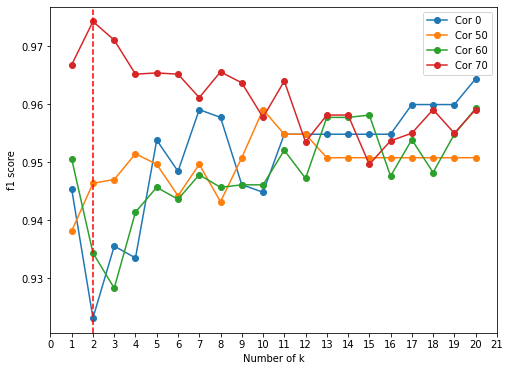

In [16]:
#Plot f1 score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(8, 6))
for i in range(len(X_test)):
  plt.plot(range(1,21),
            knn_test_f1_score[i], '-o', label = X_test_name[i])
  plt.xticks(np.arange(min(range(22)), max(range(22))+1, 1.0))

plt.axvline(x = 2, color='red', ls = '--')
plt.xlabel('Number of k')
plt.ylabel('f1 score')
plt.legend(loc = 'best')
plt.show()  # k = 2, cor = 0 : 0.974296205630355
#knn_test_f1_score[3]

In [17]:
# Toi uu thuat toan Random Forest
def randf(X_train,Y_train, score = False):
  forest1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth= 1)
  forest2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth= 2)
  forest3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth= 3)
  forest4 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth= 4)
  forest5 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth= 5)
  forest6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth= 6)
  forest7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth= 7)
  forest8 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth= 8)
  forest9 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth= 9)
  forest10 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0, max_depth= 10)
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

  forest1.fit(X_train,Y_train)
  forest2.fit(X_train,Y_train)
  forest3.fit(X_train,Y_train)
  forest4.fit(X_train,Y_train)
  forest5.fit(X_train,Y_train)
  forest6.fit(X_train,Y_train)
  forest7.fit(X_train,Y_train)
  forest8.fit(X_train,Y_train)
  forest9.fit(X_train,Y_train)
  forest10.fit(X_train,Y_train)
  forest.fit(X_train,Y_train)


  if score == True:
    return[forest1.score(X_train,Y_train), forest2.score(X_train,Y_train), forest3.score(X_train,Y_train), 
           forest4.score(X_train,Y_train), forest5.score(X_train,Y_train), forest6.score(X_train,Y_train), 
           forest7.score(X_train,Y_train), forest8.score(X_train,Y_train), forest9.score(X_train,Y_train), 
           forest10.score(X_train,Y_train),forest.score(X_train,Y_train)]
  else:
    return [forest1.fit(X_train,Y_train), forest2.fit(X_train,Y_train),forest3.fit(X_train,Y_train), 
            forest4.fit(X_train,Y_train), forest5.fit(X_train,Y_train), forest6.fit(X_train,Y_train), 
            forest7.fit(X_train,Y_train), forest8.fit(X_train,Y_train), forest9.fit(X_train,Y_train), 
            forest10.fit(X_train,Y_train), forest.fit(X_train,Y_train)]
  

In [20]:
# List accuracy score model cua cac tap test 
forest_test_score = []
for j in range(len(X_test)):
  forest_test_score1 = []   
  for i in range(11):
    #forest_test_score1.append(accuracy_score(randf(X_train[j], y_train[j])[i].predict(X_test[j]), y_test[j]))
    forest_test_score1.append(cross_val_score(randf(X_train[j], y_train[j])[i], X_test[j], y_test[j], scoring="accuracy", cv = 5).mean())
  forest_test_score.append(forest_test_score1)

# List f1 score model cua cac tap test 
forest_test_f1_score = []
for j in range(len(X_test)):
  forest_test_f1_score1 = []   
  for i in range(11):
    #forest_test_f1_score1.append(f1_score(randf(X_train[j], y_train[j])[i].predict(X_test[j]), y_test[j]))
    forest_test_f1_score1.append(cross_val_score(randf(X_train[j], y_train[j])[i], X_test[j], y_test[j], scoring="f1", cv = 5).mean())
  forest_test_f1_score.append(forest_test_f1_score1)

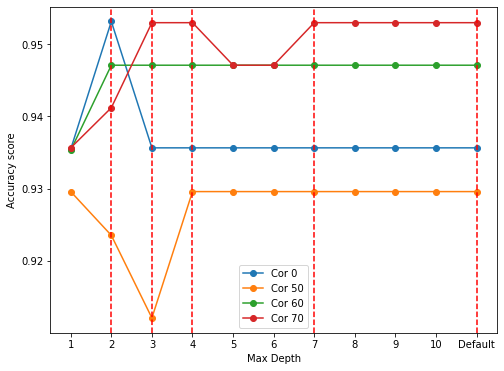

In [364]:
#Plot accuracy score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(8, 6))
for i in range(len(X_test)):
  plt.plot(['1','2','3','4','5','6','7','8','9','10','Default'],
            forest_test_score[i], '-o', label = X_test_name[i])
plt.axvline(x = 1, color='red', ls = '--')
plt.axvline(x = 2, color='red', ls = '--')
plt.axvline(x = 3, color='red', ls = '--')
plt.axvline(x = 6, color='red', ls = '--')
plt.axvline(x = 10, color='red', ls = '--')
plt.legend(loc = 'best')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy score')
plt.show() 
# Depth = 2, tree = 10, cor = 0: 0.953109243697479
# Depth = 3-4, 7-10 or default, tree = 10, cor = 70: 0.9529411764705882

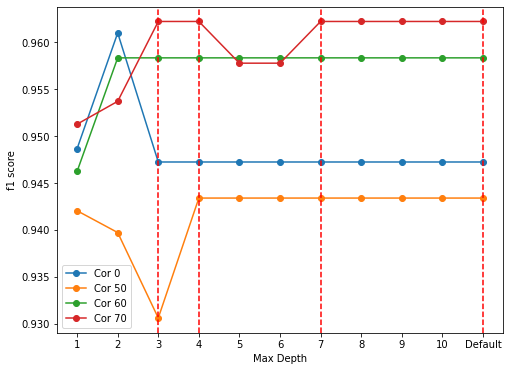

In [23]:
#Plot f1 score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(8, 6))
for i in range(len(X_test)):
  plt.plot(['1','2','3','4','5','6','7','8','9','10','Default'],
            forest_test_f1_score[i], '-o', label = X_test_name[i])
plt.axvline(x = 2, color='red', ls = '--')
plt.axvline(x = 3, color='red', ls = '--')
plt.axvline(x = 6, color='red', ls = '--')
plt.axvline(x = 10, color='red', ls = '--')
plt.legend(loc = 'best')
plt.xlabel('Max Depth')
plt.ylabel('f1 score')
plt.show() # Depth = 3-4,7-10 or default, tree = 10, cor = 70: 0.9621864440469091

In [213]:
# toi uu so luong tree
forest_1 = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0, max_depth= 1) for i in range(1,26)]
forest_2 = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0, max_depth= 2) for i in range(1,26)]
forest_3 = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0, max_depth= 3) for i in range(1,26)]
forest_4 = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0, max_depth= 4) for i in range(1,26)]
forest_5 = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0, max_depth= 5) for i in range(1,26)]
forest_6 = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0, max_depth= 6) for i in range(1,26)]
forest_7 = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0, max_depth= 7) for i in range(1,26)]
forest_8 = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0, max_depth= 8) for i in range(1,26)]
forest_9 = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0, max_depth= 9) for i in range(1,26)]
forest_10 = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0, max_depth= 10) for i in range(1,26)]
forest_def = [RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 0) for i in range(1,26)]

forest_1_test_score = [cross_val_score(forest_1[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_1))]
forest_1_test_f1_score = [cross_val_score(forest_1[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_1))]

forest_2_test_score = [cross_val_score(forest_2[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_2))]
forest_2_test_f1_score = [cross_val_score(forest_2[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_2))]

forest_3_test_score = [cross_val_score(forest_3[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_3))]
forest_3_test_f1_score = [cross_val_score(forest_3[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_3))]

forest_4_test_score = [cross_val_score(forest_4[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_4))]
forest_4_test_f1_score = [cross_val_score(forest_4[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_4))]

forest_5_test_score = [cross_val_score(forest_5[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_5))]
forest_5_test_f1_score = [cross_val_score(forest_5[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_5))]

forest_6_test_score = [cross_val_score(forest_6[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_6))]
forest_6_test_f1_score = [cross_val_score(forest_6[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_6))]

forest_7_test_score = [cross_val_score(forest_7[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_7))]
forest_7_test_f1_score = [cross_val_score(forest_7[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_7))]

forest_8_test_score = [cross_val_score(forest_8[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_8))]
forest_8_test_f1_score = [cross_val_score(forest_8[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_8))]

forest_9_test_score = [cross_val_score(forest_9[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_9))]
forest_9_test_f1_score = [cross_val_score(forest_9[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_9))]

forest_10_test_score = [cross_val_score(forest_10[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_10))]
forest_10_test_f1_score = [cross_val_score(forest_10[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_10))]

forest_def_test_score = [cross_val_score(forest_def[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="accuracy", cv = 5).mean() for i in range(len(forest_def))]
forest_def_test_f1_score = [cross_val_score(forest_def[i].fit(X_train[3], y_train[3]), X_test[3], y_test[3], scoring="f1", cv = 5).mean() for i in range(len(forest_def))]


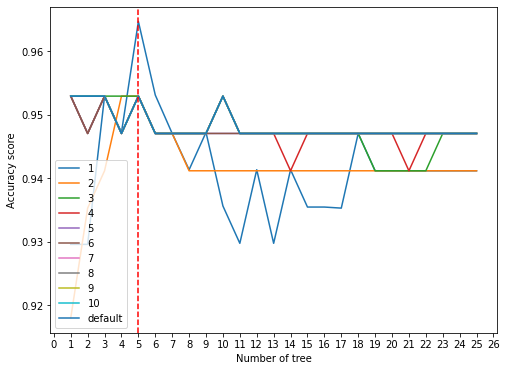

In [378]:
#Plot accuracy score
plt.subplots(figsize=(8, 6))

forest_tree_test_score = [forest_1_test_score, forest_2_test_score,
                          forest_3_test_score, forest_4_test_score, forest_5_test_score,
                          forest_6_test_score, forest_7_test_score, forest_8_test_score, 
                          forest_9_test_score, forest_10_test_score, forest_def_test_score]

forest_tree_test_score_name = list(range(1,11))
forest_tree_test_score_name.append('default')

for i in range(len(forest_tree_test_score)):
  plt.plot(range(1, 1+ len(forest_tree_test_score[i])), forest_tree_test_score[i], label = forest_tree_test_score_name[i] )

plt.xticks(np.arange(min(range(26)), max(range(27))+1, 1.0))
plt.legend(loc = 'best')
plt.axvline(x = 5, color='red', ls = '--')

plt.xlabel('Number of tree')
plt.ylabel('Accuracy score')

plt.show() # Depth = 1, cor 70, tree = 5: 0.9647058823529411
#forest_tree_test_score[0]

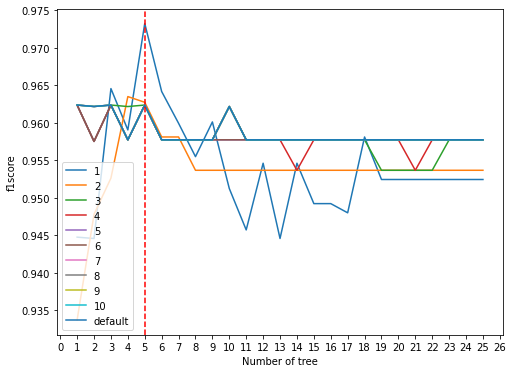

0.9623843789061179

In [372]:
#Plot f1 score
plt.subplots(figsize=(8, 6))

forest_tree_test_f1_score = [forest_1_test_f1_score, forest_2_test_f1_score,
                             forest_3_test_f1_score, forest_4_test_f1_score, forest_5_test_f1_score,
                            forest_6_test_f1_score, forest_7_test_f1_score, forest_8_test_f1_score, 
                            forest_9_test_f1_score, forest_10_test_f1_score, forest_def_test_f1_score]

forest_tree_test_f1_score_name = list(range(1,11))
forest_tree_test_f1_score_name.append('default')

for i in range(len(forest_tree_test_f1_score)):
  plt.plot(range(1, 1+ len(forest_tree_test_f1_score[i])), forest_tree_test_f1_score[i], label = forest_tree_test_f1_score_name[i] )

plt.xticks(np.arange(min(range(26)), max(range(27))+1, 1.0))
plt.legend(loc = 'best')
plt.axvline(x = 5, color='red', ls = '--')


plt.xlabel('Number of tree')
plt.ylabel('f1score')

plt.show() # Depth = 1, cor = 70, tree = 5: 0.9623843789061179
#max(forest_def_test_f1_score)

In [52]:
# Toi uu mo hinh Logistic regression
lgr_test_score = []
for i in range(len(X_test)):
  lgr_test_score.append(cross_val_score(LogisticRegression(random_state= 0).fit(X_train[i], y_train[i]), X_test[i], y_test[i], scoring="accuracy", cv = 5).mean())

lgr_test_f1_score = []
for i in range(len(X_test)):
   lgr_test_f1_score.append(cross_val_score(LogisticRegression(random_state= 0).fit(X_train[i], y_train[i]), X_test[i], y_test[i], scoring="f1", cv = 5).mean())

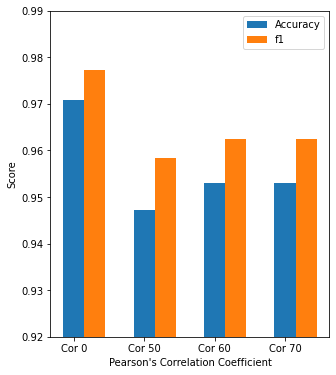

In [57]:
#Plot accuracy score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(5, 6))
width= 0.15

x_pos = [1, 1.5, 2.0, 2.5]
x_pos2 = [i+width for i in x_pos]
plt.bar(x_pos , lgr_test_score, width, label = 'Accuracy') #0.9707563025210085
plt.bar(x_pos2 , lgr_test_f1_score, width, label = 'f1') #0.977330691810457

# Create names on the x-axis
plt.xticks(x_pos, X_test_name)

#zoom
plt.ylim(0.92, 0.99)


plt.legend(loc = 'best')
plt.xlabel("Pearson's Correlation Coefficient")
plt.ylabel("Score")
plt.show()


In [54]:
# Toi uu model Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

def naibay(X_train,Y_train, score = False):
  nb_gauss  = GaussianNB()
  nb_bern  = BernoulliNB()

  nb_gauss.fit(X_train,Y_train)
  nb_bern.fit(X_train,Y_train)
  

  if score == True:
    return[nb_gauss.score(X_train,Y_train),
         nb_bern.score(X_train,Y_train)]
  else:
    return [nb_gauss.fit(X_train,Y_train),
            nb_bern.fit(X_train,Y_train)]
  

In [64]:
# List accuracy score model cua cac tap test 
naibay_test_score = []
for j in range(len(X_test)): 
  naibay_test_score1 = []
  for i in range(2):
    naibay_test_score1.append(cross_val_score(naibay(X_train[j], y_train[j])[i], X_test[j], y_test[j], scoring="accuracy", cv = 5).mean())
  naibay_test_score.append(naibay_test_score1)

# List f1 score model cua cac tap test 
naibay_test_f1_score = []
for j in range(len(X_test)):
  naibay_test_f1_score1 = []   
  for i in range(2):
    naibay_test_f1_score1.append(cross_val_score(naibay(X_train[j], y_train[j])[i], X_test[j], y_test[j], scoring="f1", cv = 5).mean())
  naibay_test_f1_score.append(naibay_test_f1_score1)

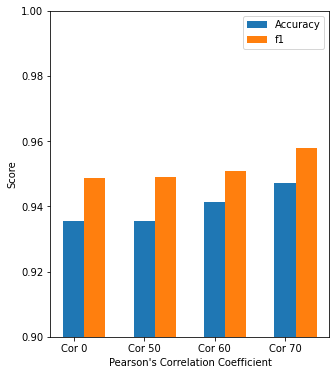

In [68]:
#Plot accuracy score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(5, 6))
width= 0.15

gaussian_test_score = [naibay_test_score[i][0] for i in range(len(naibay_test_score))]
bern_test_score = [naibay_test_score[i][1] for i in range(len(naibay_test_score))]
gaussian_test_f1_score = [naibay_test_f1_score[i][0] for i in range(len(naibay_test_f1_score))]
bern_test_f1_score = [naibay_test_f1_score[i][1] for i in range(len(naibay_test_f1_score))]

x_pos = [1, 1.5, 2.0, 2.5]
x_pos2 = [i+width for i in x_pos]
plt.bar(x_pos , gaussian_test_score, width, label = 'Accuracy') #0.9472268907563025
plt.bar(x_pos2 , gaussian_test_f1_score, width, label = 'f1') #0.9577466977466976

# Create names on the x-axis
plt.xticks(x_pos, X_test_name)

#zoom
plt.ylim(0.90, 1.00)


plt.legend(loc = 'best')
plt.xlabel("Pearson's Correlation Coefficient")
plt.ylabel("Score")
plt.show()

#max(gaussian_test_f1_score)

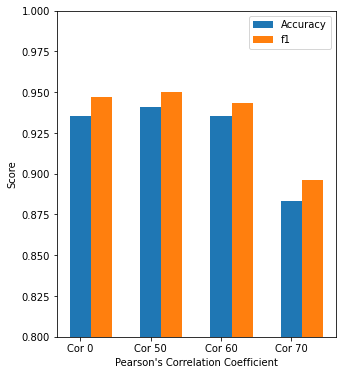

In [72]:
#Plot accuracy score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(5, 6))
width= 0.15

gaussian_test_score = [naibay_test_score[i][0] for i in range(len(naibay_test_score))]
bern_test_score = [naibay_test_score[i][1] for i in range(len(naibay_test_score))]
gaussian_test_f1_score = [naibay_test_f1_score[i][0] for i in range(len(naibay_test_f1_score))]
bern_test_f1_score = [naibay_test_f1_score[i][1] for i in range(len(naibay_test_f1_score))]

x_pos = [1, 1.5, 2.0, 2.5]
x_pos2 = [i+width for i in x_pos]
plt.bar(x_pos , bern_test_score, width, label = 'Accuracy') #0.9411764705882353
plt.bar(x_pos2 , bern_test_f1_score, width, label = 'f1') #0.9499285755099708

# Create names on the x-axis
plt.xticks(x_pos, X_test_name)

#zoom
plt.ylim(0.80, 1.00)


plt.legend(loc = 'best')
plt.xlabel("Pearson's Correlation Coefficient")
plt.ylabel("Score")
plt.show()


In [73]:
# Toi uu model SVC
from sklearn.svm import SVC

def svc(X_train,Y_train, score = False):
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_pol = SVC(kernel = 'poly', random_state = 0)
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_sig = SVC(kernel = 'sigmoid', random_state = 0)


  svc_lin.fit(X_train, Y_train)
  svc_pol.fit(X_train, Y_train)
  svc_rbf.fit(X_train, Y_train)
  svc_sig.fit(X_train, Y_train)
  

  if score == True:
    return[svc_lin.score(X_train,Y_train), svc_pol.score(X_train,Y_train), 
           svc_rbf.score(X_train,Y_train), svc_sig.score(X_train,Y_train)]
  else:
    return [svc_lin.fit(X_train,Y_train), svc_pol.fit(X_train,Y_train), 
            svc_rbf.fit(X_train,Y_train), svc_sig.fit(X_train,Y_train)]

In [75]:
# List accuracy score model cua cac tap test 
svc_test_score = []
for j in range(len(X_test)):
  svc_test_score1 = []   
  for i in range(4):
    svc_test_score1.append(cross_val_score(svc(X_train[j], y_train[j])[i], X_test[j], y_test[j], scoring="accuracy", cv = 5).mean())
  svc_test_score.append(svc_test_score1)

# List f1 score model cua cac tap test 
svc_test_f1_score = []
for j in range(len(X_test)):
  svc_test_f1_score1 = []   
  for i in range(4):
    svc_test_f1_score1.append(cross_val_score(svc(X_train[j], y_train[j])[i], X_test[j], y_test[j], scoring="f1", cv = 5).mean())
  svc_test_f1_score.append(svc_test_f1_score1)

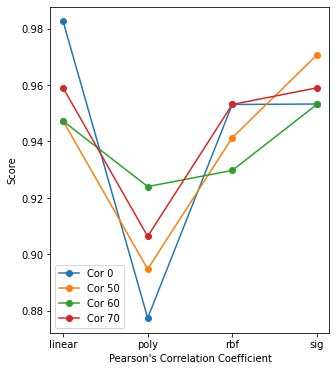

[0.9825210084033614, 0.8774789915966386, 0.953109243697479, 0.9532773109243697]

In [78]:
#Plot accuracy score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(5, 6))
width= 0.15

x_pos = [1, 1.5, 2.0, 2.5]
x_pos2 = [i+width for i in x_pos]
for i in range(len(X_test)):
  plt.plot(['linear','poly','rbf','sig'],
            svc_test_score[i], '-o', label = X_test_name[i])


plt.legend(loc = 'best')
plt.xlabel("Pearson's Correlation Coefficient")
plt.ylabel("Score")
plt.show()

# print(svc_test_score[0][0], svc_test_score[2][0])
# Cor0, Linear: 0.9825210084033614


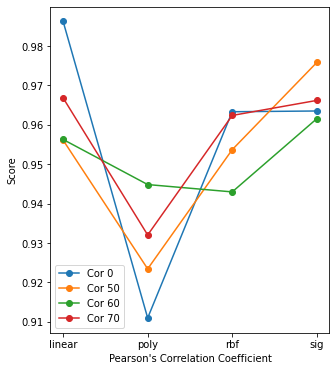

In [81]:
#Plot f1 score
X_test_name = ['Cor 0', 'Cor 50', 'Cor 60', 'Cor 70']
plt.subplots(figsize=(5, 6))
width= 0.15

x_pos = [1, 1.5, 2.0, 2.5]
x_pos2 = [i+width for i in x_pos]
for i in range(len(X_test)):
  plt.plot(['linear','poly','rbf','sig'],
            svc_test_f1_score[i], '-o', label = X_test_name[i])


plt.legend(loc = 'best')
plt.xlabel("Pearson's Correlation Coefficient")
plt.ylabel("Score")
plt.show()

#Cor0, Linear: 0.9862330623306234


In [375]:
# Resampling to compare optimal models

# Decision Tree: Cor = 50, Max depth = default
cross_val_score(dct(X_train[1], y_train[1])[10], X_test[1], y_test[1], scoring="accuracy", cv = 5).mean()

# KNN: Cor = 70, K-neibour = 2
cross_val_score(knn(X_train[3], y_train[3])[1], X_test[3], y_test[3], scoring="accuracy", cv = 5).mean()

# Random Forest: Depth = default, cor 30, tree = 1-3,5 or 10
#cross_val_score(randf(X_train[3], y_train[3])[10], X_test[3], y_test[3], scoring="accuracy", cv = 5).mean()
forest_tree_test_score[0][4]

#Logistic Regression: Cor = 0
cross_val_score(LogisticRegression(random_state= 0).fit(X_train[0], y_train[0]), X_test[0], y_test[0], scoring="accuracy", cv = 5).mean()

#Naive Bayes: Gaussian , Cor = 70
cross_val_score(naibay(X_train[3], y_train[3])[0], X_test[3], y_test[3], scoring="accuracy", cv = 5).mean()

#SVC: Linear, Cor = 0
cross_val_score(svc(X_train[0], y_train[0])[0], X_test[0], y_test[0], scoring="accuracy", cv = 5).mean()

Opt_Model = [cross_val_score(dct(X_train[1], y_train[1])[10], X_test[1], y_test[1], scoring="accuracy", cv = 5).mean(),
             cross_val_score(knn(X_train[3], y_train[3])[1], X_test[3], y_test[3], scoring="accuracy", cv = 5).mean(),
             #cross_val_score(randf(X_train[3], y_train[3])[10], X_test[3], y_test[3], scoring="accuracy", cv = 5).mean(),
             forest_tree_test_score[0][4],
             cross_val_score(LogisticRegression(random_state= 0).fit(X_train[0], y_train[0]), X_test[0], y_test[0], scoring="accuracy", cv = 5).mean(),
             cross_val_score(naibay(X_train[3], y_train[3])[0], X_test[3], y_test[3], scoring="accuracy", cv = 5).mean(),
             cross_val_score(svc(X_train[0], y_train[0])[0], X_test[0], y_test[0], scoring="accuracy", cv = 5).mean()]


In [376]:
# Resampling to compare optimal models

# Decision Tree: Cor = 50, Max depth = default
cross_val_score(dct(X_train[1], y_train[1])[10], X_test[1], y_test[1], scoring="f1", cv = 5).mean()

# KNN: Cor = 70, K-neibour = 2
cross_val_score(knn(X_train[3], y_train[3])[1], X_test[3], y_test[3], scoring="f1", cv = 5).mean()

# Random Forest: Depth = 1, cor 70, tree = 5
#cross_val_score(randf(X_train[3], y_train[3])[10], X_test[3], y_test[3], scoring="f1", cv = 5).mean()
forest_tree_test_f1_score[0][4]

#Logistic Regression: Cor = 0
cross_val_score(LogisticRegression(random_state= 0).fit(X_train[0], y_train[0]), X_test[0], y_test[0], scoring="f1", cv = 5).mean()

#Naive Bayes: Gaussian , Cor = 70
cross_val_score(naibay(X_train[3], y_train[3])[0], X_test[3], y_test[3], scoring="f1", cv = 5).mean()

#SVC: Linear, Cor = 0
cross_val_score(svc(X_train[0], y_train[0])[0], X_test[0], y_test[0], scoring="f1", cv = 5).mean()

Opt_f1_Model = [cross_val_score(dct(X_train[1], y_train[1])[10], X_test[1], y_test[1], scoring="f1", cv = 5).mean(),
             cross_val_score(knn(X_train[3], y_train[3])[1], X_test[3], y_test[3], scoring="f1", cv = 5).mean(),
             #cross_val_score(randf(X_train[3], y_train[3])[10], X_test[3], y_test[3], scoring="f1", cv = 5).mean(),
             forest_tree_test_f1_score[0][4],
             cross_val_score(LogisticRegression(random_state= 0).fit(X_train[0], y_train[0]), X_test[0], y_test[0], scoring="f1", cv = 5).mean(),
             cross_val_score(naibay(X_train[3], y_train[3])[0], X_test[3], y_test[3], scoring="f1", cv = 5).mean(),
             cross_val_score(svc(X_train[0], y_train[0])[0], X_test[0], y_test[0], scoring="f1", cv = 5).mean()]

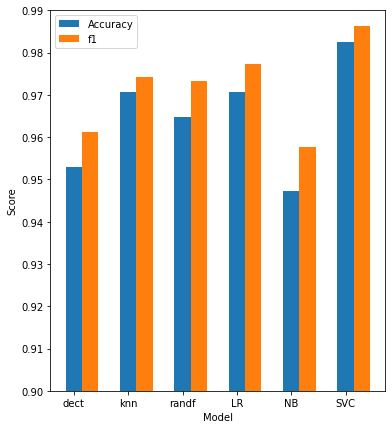

In [402]:
plt.subplots(figsize=(6, 7))
name = ['dect', 'knn', 'randf', 'LR', 'NB', 'SVC']
x_pos = [1, 2, 3, 4, 5, 6]
x_pos2 = [i+0.3 for i in x_pos]

plt.bar(x_pos, Opt_Model, 0.3, label = 'Accuracy')
plt.bar(x_pos2, Opt_f1_Model, 0.3, label = 'f1')

# Create names on the x-axis
plt.xticks(x_pos, name)

plt.ylim(0.90, 0.99)
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(loc = 'best')

plt.show()



In [ ]:
# resampling (not use)
# accuracy score
opt_dect = [accuracy_score(dct(X_train[0], y_train[0])[5].predict(X_test[0]), y_test[0])]
opt_knn = [accuracy_score(knn(X_train[0], y_train[0])[3].predict(X_test[0]), y_test[0])]
opt_randf = [accuracy_score(forest_def[21].fit(X_train[0], y_train[0]).predict(X_test[0]), y_test[0])]
opt_lg = [accuracy_score(LogisticRegression(random_state= 0).fit(X_train[0], y_train[0]).predict(X_test[0]), y_test[0])]
opt_NB = [accuracy_score(naibay(X_train[3], y_train[3])[0].predict(X_test[3]), y_test[3])]
opt_sv = [accuracy_score(svc(X_train[0], y_train[0])[0].predict(X_test[0]), y_test[0])]

# f1 score
opt_dect_f1 = [f1_score(dct(X_train[0], y_train[0])[5].predict(X_test[0]), y_test[0])]
opt_knn_f1 = [f1_score(knn(X_train[0], y_train[0])[3].predict(X_test[0]), y_test[0])]
opt_randf_f1 = [f1_score(forest_def[21].fit(X_train[0], y_train[0]).predict(X_test[0]), y_test[0])]
opt_lg_f1 = [f1_score(LogisticRegression(random_state= 0).fit(X_train[0], y_train[0]).predict(X_test[0]), y_test[0])]
opt_NB_f1 = [f1_score(naibay(X_train[3], y_train[3])[0].predict(X_test[3]), y_test[3])]
opt_sv_f1 = [f1_score(svc(X_train[0], y_train[0])[0].predict(X_test[0]), y_test[0])]

for i in range(50):
  X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(data[cor_00], data['Target'], test_size = 0.3)

  opt_dect.append(accuracy_score(dct(X_train_rand, y_train_rand)[5].predict(X_test_rand), y_test_rand))
  opt_knn.append(accuracy_score(knn(X_train_rand, y_train_rand)[3].predict(X_test_rand), y_test_rand))
  opt_randf.append(accuracy_score(forest_def[21].fit(X_train_rand, y_train_rand).predict(X_test_rand), y_test_rand))
  opt_lg.append(accuracy_score(LogisticRegression(random_state= 0).fit(X_train_rand, y_train_rand).predict(X_test_rand), y_test_rand))
  opt_sv.append(accuracy_score(svc(X_train_rand, y_train_rand)[0].predict(X_test_rand), y_test_rand))

  opt_dect_f1.append(f1_score(dct(X_train_rand, y_train_rand)[5].predict(X_test_rand), y_test_rand))
  opt_knn_f1.append(f1_score(knn(X_train_rand, y_train_rand)[3].predict(X_test_rand), y_test_rand))
  opt_randf_f1.append(f1_score(forest_def[21].fit(X_train_rand, y_train_rand).predict(X_test_rand), y_test_rand))
  opt_lg_f1.append(f1_score(LogisticRegression(random_state= 0).fit(X_train_rand, y_train_rand).predict(X_test_rand), y_test_rand))
  
  opt_sv_f1.append(f1_score(svc(X_train_rand, y_train_rand)[0].predict(X_test_rand), y_test_rand))

  X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(data[cor_70], data['Target'], test_size = 0.3)

  opt_NB.append(accuracy_score(naibay(X_train_rand, y_train_rand)[0].predict(X_test_rand), y_test_rand))
  opt_NB_f1.append(f1_score(naibay(X_train_rand, y_train_rand)[0].predict(X_test_rand), y_test_rand))




In [399]:
Opt_Box_Model = [cross_val_score(dct(X_train[1], y_train[1])[10], X_test[1], y_test[1], scoring="accuracy", cv = 4),
             cross_val_score(knn(X_train[3], y_train[3])[1], X_test[3], y_test[3], scoring="accuracy", cv = 4),
             #cross_val_score(randf(X_train[3], y_train[3])[10], X_test[3], y_test[3], scoring="accuracy", cv = 4),
             cross_val_score(RandomForestClassifier(n_estimators = 3, criterion = 'entropy', random_state = 0, max_depth= 1).fit(X_train[0], y_train[0]), X_test[0], y_test[0], scoring="accuracy", cv = 4),
             cross_val_score(LogisticRegression(random_state= 0).fit(X_train[0], y_train[0]), X_test[0], y_test[0], scoring="accuracy", cv = 4),
             cross_val_score(naibay(X_train[3], y_train[3])[0], X_test[3], y_test[3], scoring="accuracy", cv = 4),
             cross_val_score(svc(X_train[0], y_train[0])[0], X_test[0], y_test[0], scoring="accuracy", cv = 4)]

Opt_Box_f1_Model = [cross_val_score(dct(X_train[1], y_train[1])[10], X_test[1], y_test[1], scoring="f1", cv = 4),
             cross_val_score(knn(X_train[3], y_train[3])[1], X_test[3], y_test[3], scoring="f1", cv = 4),
             #cross_val_score(randf(X_train[3], y_train[3])[10], X_test[3], y_test[3], scoring="f1", cv = 4),
             cross_val_score(RandomForestClassifier(n_estimators = 3, criterion = 'entropy', random_state = 0, max_depth= 1).fit(X_train[0], y_train[0]), X_test[0], y_test[0], scoring="f1", cv = 4),
             cross_val_score(LogisticRegression(random_state= 0).fit(X_train[0], y_train[0]), X_test[0], y_test[0], scoring="f1", cv = 4),
             cross_val_score(naibay(X_train[3], y_train[3])[0], X_test[3], y_test[3], scoring="f1", cv = 4),
             cross_val_score(svc(X_train[0], y_train[0])[0], X_test[0], y_test[0], scoring="f1", cv = 4)]

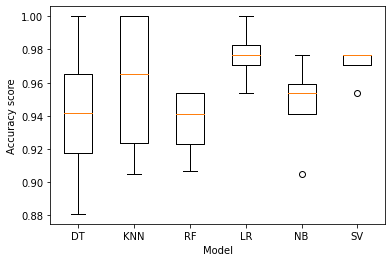

In [400]:
#plt.boxplot(opt_score)
plt.boxplot(Opt_Box_Model)

plt.xlabel('Model')
plt.ylabel('Accuracy score')

plt.xticks([1, 2, 3, 4, 5, 6], ['DT', 'KNN', 'RF','LR', 'NB', 'SV'])

plt.show()

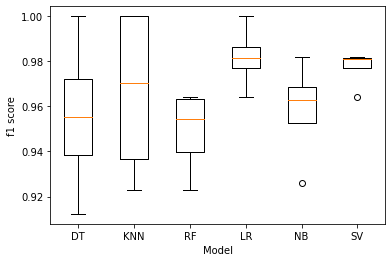

In [401]:
#plt.boxplot(opt_score)
plt.boxplot(Opt_Box_f1_Model)

plt.xlabel('Model')
plt.ylabel('f1 score')

plt.xticks([1, 2, 3, 4, 5, 6], ['DT', 'KNN', 'RF','LR', 'NB', 'SV'])

plt.show()

In [ ]:
# time logistic regression
import time 
train_lg = []
test_lg = []
for i in range(1,10):
  train_lg1 = []
  test_lg1 = []
  for j in range(100):
    X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(data[cor_00], data['Target'], test_size = (1 - 0.1*i))
    s = time.time()
    a = LogisticRegression(random_state= 0).fit(X_train_rand, y_train_rand)
    train_lg1.append(time.time() - s)
    s = time.time()
    a.predict(X_test_rand)
    test_lg1.append(time.time() - s)
  train_lg.append(train_lg1)
  test_lg.append(test_lg1)


In [156]:
# time knn
import time 
train_knn = []
test_knn = []
for i in range(1,10):
  train_knn1 = []
  test_knn1 = []
  for j in range(100):
    X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(data[cor_00], data['Target'], test_size = (1 - 0.1*i))
    s = time.time()
    a = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2).fit(X_train_rand, y_train_rand)
    train_knn1.append(time.time() - s)
    s = time.time()
    a.predict(X_test_rand)
    test_knn1.append(time.time() - s)
  train_knn.append(train_knn1)
  test_knn.append(test_knn1)

In [157]:
# time dect
import time 
train_dect = []
test_dect = []
for i in range(1,10):
  train_dect1 = []
  test_dect1 = []
  for j in range(100):
    X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(data[cor_00], data['Target'], test_size = (1 - 0.1*i))
    s = time.time()
    a =  DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth= 4).fit(X_train_rand, y_train_rand)
    train_dect1.append(time.time() - s)
    s = time.time()
    a.predict(X_test_rand)
    test_dect1.append(time.time() - s)
  train_dect.append(train_dect1)
  test_dect.append(test_dect1)

In [158]:
# time randf
import time 
train_randf = []
test_randf = []
for i in range(1,10):
  train_randf1 = []
  test_randf1 = []
  for j in range(100):
    X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(data[cor_00], data['Target'], test_size = (1 - 0.1*i))
    s = time.time()
    a =  RandomForestClassifier(n_estimators = 22, criterion = 'entropy', random_state = 0).fit(X_train_rand, y_train_rand)
    train_randf1.append(time.time() - s)
    s = time.time()
    a.predict(X_test_rand)
    test_randf1.append(time.time() - s)
  train_randf.append(train_randf1)
  test_randf.append(test_randf1)

In [159]:
# time NB
import time 
train_NB = []
test_NB = []
for i in range(1,10):
  train_NB1 = []
  test_NB1 = []
  for j in range(100):
    X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(data[cor_00], data['Target'], test_size = (1 - 0.1*i))
    s = time.time()
    a =  GaussianNB().fit(X_train_rand, y_train_rand)
    train_NB1.append(time.time() - s)
    s = time.time()
    a.predict(X_test_rand)
    test_NB1.append(time.time() - s)
  train_NB.append(train_NB1)
  test_NB.append(test_NB1)

In [160]:
# time SVC
import time 
train_sv = []
test_sv = []
for i in range(1,10):
  train_sv1 = []
  test_sv1 = []
  for j in range(50):
    X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(data[cor_00], data['Target'], test_size = (1 - 0.1*i))
    s = time.time()
    a =  SVC(kernel = 'linear', random_state = 0).fit(X_train_rand, y_train_rand)
    train_sv1.append(time.time() - s)
    s = time.time()
    a.predict(X_test_rand)
    test_sv1.append(time.time() - s)
  train_sv.append(train_sv1)
  test_sv.append(test_sv1)

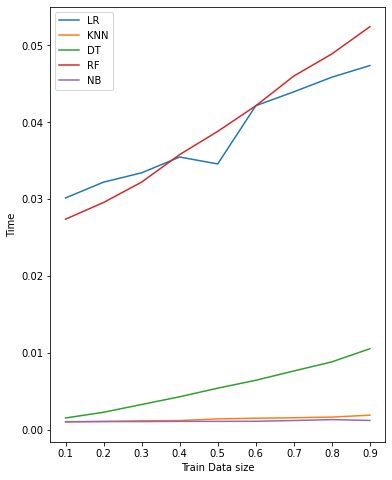

In [179]:
# training lg time
import statistics
plt.subplots(figsize=(6, 8))
train_lg_mean = []
train_knn_mean = []
train_dect_mean = []
train_randf_mean = []
train_NB_mean = []
train_sv_mean = []

mean_name = ['LR', 'KNN', 'DT', 'RF', 'NB']
#, 'SV']

for i in range(len(test_lg)):
  train_lg_mean.append(statistics.mean(train_lg[i]))
  train_knn_mean.append(statistics.mean(train_knn[i]))
  train_dect_mean.append(statistics.mean(train_dect[i]))
  train_randf_mean.append(statistics.mean(train_randf[i]))
  train_NB_mean.append(statistics.mean(train_NB[i]))
  #train_sv_mean.append(statistics.mean(train_sv[i]))

  train_mean = [train_lg_mean, 
                train_knn_mean, 
                train_dect_mean,
                train_randf_mean,
                train_NB_mean]
                #train_sv_mean]

for i in range(len(train_mean)):
  plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], (train_mean[i]), label = mean_name[i])

plt.xlabel('Train Data size')
plt.ylabel('Time')
plt.legend(loc = 'best')

plt.show()

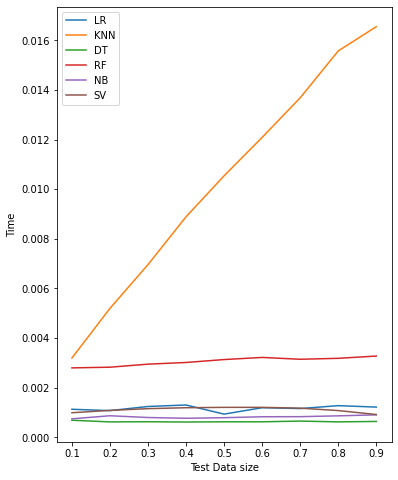

In [180]:
# testing time
import statistics
plt.subplots(figsize=(6, 8))
test_lg_mean = []
test_knn_mean = []
test_dect_mean = []
test_randf_mean = []
test_NB_mean = []
test_sv_mean = []

mean_name = ['LR', 'KNN', 'DT', 'RF', 'NB', 'SV']

for i in range(len(test_lg)):
  test_lg_mean.append(statistics.mean(test_lg[i]))
  test_knn_mean.append(statistics.mean(test_knn[i]))
  test_dect_mean.append(statistics.mean(test_dect[i]))
  test_randf_mean.append(statistics.mean(test_randf[i]))
  test_NB_mean.append(statistics.mean(test_NB[i]))
  test_sv_mean.append(statistics.mean(test_sv[i]))

  test_mean = [test_lg_mean, test_knn_mean, test_dect_mean,test_randf_mean,
               test_NB_mean,test_sv_mean]

for i in range(len(test_mean)):
  plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], (test_mean[i])[::-1], label = mean_name[i] )

plt.xlabel('Test Data size')
plt.ylabel('Time')
plt.legend(loc = 'best')

plt.show()

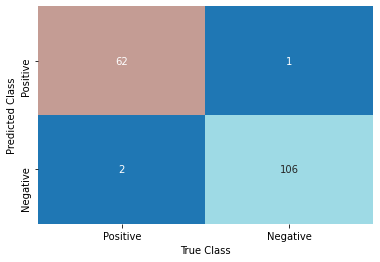

In [211]:
y_pred = SVC(kernel = 'linear', random_state = 0).fit(X_train_00, y_train_00).predict(X_test_00)
cm = confusion_matrix(y_test_00, y_pred)
sns.heatmap(cm,annot=True, 
            yticklabels= ['Positive', 'Negative'],
            xticklabels= ['Positive', 'Negative'],
            fmt="d",
            cmap="tab20",
            cbar=False)

plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()


In [381]:
#3d plot for Random Forest
depth_name = np.array(['1','2','3','4','5','6','7','8','9','10','Default'])
tree_name = np.arange(1, 26, 1)
depth_name2 = np.arange(1, 12, 1)
forest_tree_test_score = np.array([forest_1_test_score, forest_2_test_score,
                          forest_3_test_score, forest_4_test_score, forest_5_test_score,
                          forest_6_test_score, forest_7_test_score, forest_8_test_score, 
                          forest_9_test_score, forest_10_test_score, forest_def_test_score])

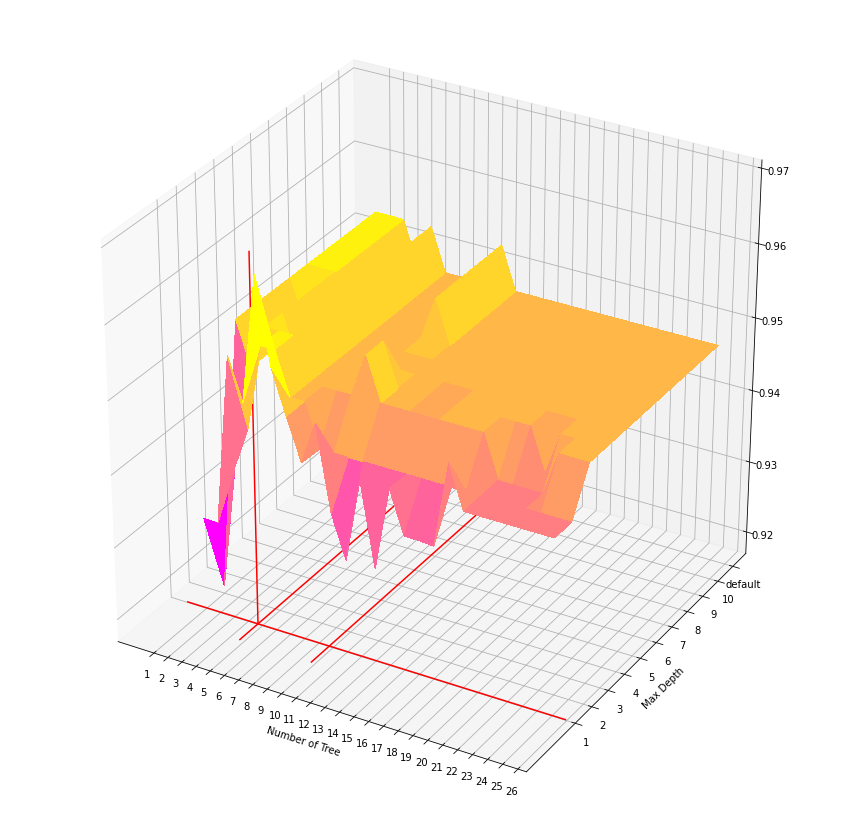

In [394]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(1, 26, 1)
Y = np.arange(1, 12, 1)
X, Y = np.meshgrid(X, Y)
Z = forest_tree_test_score


# Plot the surface.
surf = ax.plot_surface(X, Y, Z,cmap=cm.spring,
                       linewidth=0, antialiased=False)


ax.set_xlim(-1.01, 1.01)
plt.xticks(1 + np.arange(min(range(26)), max(range(26))+1, 1.0))
#plt.yticks(1+ np.arange(min(range(12)), max(range(12))+1, 1.0))

y_test_name = [1,2,3,4,5,6,7,8,9,10,'default']
y_pos = list(range(1,12,1))
plt.yticks(y_pos, y_test_name)

ax.plot3D(np.linspace(6, 6, 10), np.linspace(0, 0, 10), np.linspace(0.92, 0.97, 10), 'red')
ax.plot3D(np.linspace(6, 6, 10), np.linspace(-1, 10, 10), np.linspace(0.92, 0.92, 10), 'red')
ax.plot3D(np.linspace(1, 27, 10), np.linspace(0, 0, 10), np.linspace(0.92, 0.92, 10), 'red')
ax.plot3D(np.linspace(11, 11, 10), np.linspace(-1, 10, 10), np.linspace(0.92, 0.92, 10), 'red')

plt.xlabel('Number of Tree')
plt.ylabel('Max Depth')

plt.show()